## Final Project Submission

Please fill out:
* Student name: Lauren Aronson
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Victor Geislinger
* Blog post URL:


# King County House Sales Analysis

## 0. Business Understanding

The objective for this project is to explore the King County House Sales dataset to determine the features that highly influence housing prices in the region.

## 1. First Look at Data



### 1a. Import Libraries & View Initial Dataset

In [1]:
#Import Python Libraries 
from IPython.display import Markdown as md
import pandas as pd
import numpy as np
import statsmodels as sm
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import Data and view first 5 columns
data_init = pd.read_csv('kc_house_data.csv')
data_init.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
#review information to analyze dataset
data_init.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


In [4]:
# Return some interesting data information (null values, data length)
init_data_size = len(data_init)
print(init_data_size)
data_init.isna().sum()

21597


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Initial Findings: 
- there are 21,597 total records
- most data is an int64 or float64
- there are 2 ojbects - date and sqft_basement
- null values exist for waterfront, view and yr_renovated

## 2:  Clean Data

### 2a: Clean Data: Null Values
After analyzing the initial dataset, it appears there are null values existing for "view", "waterfront" and "yr_renovated".  After taking a look at each of these columns the data was updated as follows:

In [5]:
#percentage of missing data for each field with null values to decide if should remove, replace or keep the null values 
yr_ren_miss_perc = str(round(len(data_init[data_init.yr_renovated.isna()])/len(data_init),3)*100)
waterfront_miss_perc = str(round(len(data_init[data_init.waterfront.isna()])/len(data_init),3)*100)
view_miss_perc = str(round(len(data_init[data_init.view.isna()])/len(data_init),3)*100)

print('yr_renovated missing data: ', yr_ren_miss_perc + '%')
print('waterfront missing data: ', waterfront_miss_perc + '%')
print('view missing data: ', view_miss_perc + '%')

yr_renovated missing data:  17.8%
waterfront missing data:  11.0%
view missing data:  0.3%


#### 2a  i: Yr_renovated:

In [6]:
#Look at how many unique values exist for yr_renovated 
yr_ren_unique = data_init['yr_renovated'].nunique()
print('unique yr_renovated values =', yr_ren_unique)

unique yr_renovated values = 70


0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
2000.0       29
2005.0       29
1990.0       22
2004.0       22
2009.0       21
1989.0       20
2006.0       20
2002.0       17
1991.0       16
1998.0       16
1984.0       16
1999.0       15
2008.0       15
2010.0       15
2001.0       15
1983.0       15
2015.0       14
1985.0       14
1986.0       14
1987.0       14
1994.0       14
1992.0       13
1993.0       12
1997.0       12
1995.0       12
          ...  
1975.0        5
1964.0        5
1969.0        4
1963.0        4
1973.0        4
1981.0        4
1965.0        4
1978.0        3
1960.0        3
1958.0        3
1956.0        3
1955.0        3
1945.0        3
1972.0        3
1967.0        2
1957.0        2
1940.0        2
1974.0        2
1962.0        2
1953.0        1
1950.0        1
1934.0        1
1944.0        1
1976.0        1
1948.0        1
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Leng

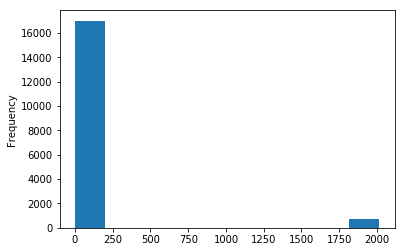

In [7]:
#Look at yr_renovated in more detail 
data_init.yr_renovated.plot(kind = 'hist')  
data_init.yr_renovated.unique()
data_init.yr_renovated.value_counts() #it looks like most houses have not been renovated

In [8]:
#determine percentage of 0.0 and 2014 - first and second largest categrories
yr_ren_zero = str(round((data_init[data_init['yr_renovated'] == 0.0].count()['yr_renovated'] 
                         / len(data_init)),2) * 100)
print('percentage of yr_renovated 0.0 values =', yr_ren_zero + '%')

yr_ren_2014 = str(round((data_init[data_init['yr_renovated'] == 2014].count()['yr_renovated'] 
                         / len(data_init)),3) * 100)
print('percentage of yr_renovated 2014 values =', yr_ren_2014 + '%')

percentage of yr_renovated 0.0 values = 79.0%
percentage of yr_renovated 2014 values = 0.3%


In [9]:
md('Findings: Approximately {}% of "yr_renovated" data had null values. There are {} different data types'.format(yr_ren_miss_perc, yr_ren_unique)
   + ' for this column and when taking a closer look at the unique values and using a histogram plot,' 
   + ' it appears {}% of these values were set to 0 (not renovated), with the next largest equal to the year 2014 ({}%).'.format(yr_ren_zero, yr_ren_2014)
   + '  Therefore, since this data are years, the 0 will be changed to null values and the current null values will be kept.')

Findings: Approximately 17.8% of "yr_renovated" data had null values. There are 70 different data types for this column and when taking a closer look at the unique values and using a histogram plot, it appears 79.0% of these values were set to 0 (not renovated), with the next largest equal to the year 2014 (0.3%).  Therefore, since this data are years, the 0 will be changed to null values and the current null values will be kept.

In [10]:
#set new dataframe as start to edit 
data = data_init 

#reorder columns to get price (target variable) at the beginning
cols = list(data.columns.values) #Make a list of all of the columns in the data
cols.pop(cols.index('price')) #Remove price from list
cols.pop(cols.index('id')) #Remove id from list
data = data[['id', 'price'] + cols] #Create new dataframe with id then price at the beginning

#set id as index
data = data.set_index('id')
data.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,10/13/2014,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,538000.0,12/9/2014,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,180000.0,2/25/2015,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,604000.0,12/9/2014,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,510000.0,2/18/2015,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [11]:
# change 0 to null
data.loc[data['yr_renovated'] == 0.0, 'yr_renovated'] = np.nan
data['yr_renovated'].value_counts()

2014.0    73
2013.0    31
2003.0    31
2007.0    30
2005.0    29
2000.0    29
2004.0    22
1990.0    22
2009.0    21
1989.0    20
2006.0    20
2002.0    17
1984.0    16
1998.0    16
1991.0    16
1999.0    15
2008.0    15
2010.0    15
2001.0    15
1983.0    15
2015.0    14
1985.0    14
1986.0    14
1987.0    14
1994.0    14
1992.0    13
1993.0    12
1997.0    12
1995.0    12
1996.0    11
          ..
1975.0     5
1964.0     5
1969.0     4
1963.0     4
1973.0     4
1981.0     4
1965.0     4
1978.0     3
1960.0     3
1958.0     3
1956.0     3
1955.0     3
1945.0     3
1972.0     3
1967.0     2
1957.0     2
1940.0     2
1974.0     2
1962.0     2
1953.0     1
1950.0     1
1934.0     1
1944.0     1
1976.0     1
1948.0     1
1946.0     1
1959.0     1
1971.0     1
1951.0     1
1954.0     1
Name: yr_renovated, Length: 69, dtype: int64

#### 2a  ii: waterfront:

In [12]:
#Look at how many unique values exist for waterfront
waterfront_unique = data['waterfront'].nunique()
print('unique waterfront values =', waterfront_unique)

unique waterfront values = 2


In [13]:
#Look into waterfront's values further
data.waterfront.value_counts() 

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [14]:
#determine percentage of 0.0 and 1.0 - first and second largest categrories

waterfront_zero = str(round((data[data['waterfront'] == 0.0].count()['waterfront'] 
                         / len(data)),2) * 100)
print('percentage of waterfront 0.0 values =', waterfront_zero + '%')

waterfront_one = str(round((data[data['waterfront'] == 1.0].count()['waterfront'] 
                         / len(data)),2) * 100)
print('percentage of waterfront 1.0 values =', waterfront_one + '%')

percentage of waterfront 0.0 values = 88.0%
percentage of waterfront 1.0 values = 1.0%


In [15]:
md('Approximately {}% of "waterfront" data had null values. There are {} different data types'.format(waterfront_miss_perc, waterfront_unique)
   + ' for this column and when taking a closer look at the unique values' 
   + ' it appears {}% of these values are equal to 0.0 and {}% are equal to 1.0.'.format(waterfront_zero, waterfront_one)
   + ' Therefore, since the majority is equal to 0.0, the null values will be replaced with 0.0 here.')

Approximately 11.0% of "waterfront" data had null values. There are 2 different data types for this column and when taking a closer look at the unique values it appears 88.0% of these values are equal to 0.0 and 1.0% are equal to 1.0. Therefore, since the majority is equal to 0.0, the null values will be replaced with 0.0 here.

In [16]:
#Set the null values equal to 0.0
data['waterfront'] = data['waterfront'].fillna(value = 0.0)
data.isna().sum() #check

price                0
date                 0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                63
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated     20853
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

#### 2a  iii: view:

In [17]:
#Look at how many unique values exist for view
view_unique = data['view'].nunique()
print('unique view values =', view_unique)

unique view values = 5


In [18]:
#Look into views's values further
data.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [19]:
#determine percentage of 0.0

view_zero = str(round((data[data['view'] == 0.0].count()['view'] 
                         / len(data)),2) * 100)
print('percentage of view 0.0 values =', view_zero + '%')

percentage of view 0.0 values = 90.0%


In [20]:
md('Approximately {}% of the "view" data had null values.'.format(view_miss_perc) 
   + ' It appears most houses were viewed 0 times (at {}%), ranging from 0-4 times in total.'.format(view_zero)
   + ' However, since this was such a low percentage of the overall dataset,' 
   + ' the rows with null values will be dropped from the dataset.') 

Approximately 0.3% of the "view" data had null values. It appears most houses were viewed 0 times (at 90.0%), ranging from 0-4 times in total. However, since this was such a low percentage of the overall dataset, the rows with null values will be dropped from the dataset.

In [21]:
#Drop the null view values from the data
data = data.dropna(subset=['view'])
data.isna().sum() #check

price                0
date                 0
bedrooms             0
bathrooms            0
sqft_living          0
sqft_lot             0
floors               0
waterfront           0
view                 0
condition            0
grade                0
sqft_above           0
sqft_basement        0
yr_built             0
yr_renovated     20791
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

### 2b:  Clean Data: Duplicates, Outliers and Extraneous Values

After cleaning the data for null values, the next step is to look through the data for any strange occurances.  

- There were no duplicate records
- The data showed one record with 33 bedrooms.  Looking further into this record, based on the square footage it appeared incorrect and the row was removed from the dataset.  
- sqft_basement had records with ? values.  Looking further into this field, they were set to 0.0 based on the majority of data here equaling 0.

Please see as follows:

In [22]:
#relook at data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21534 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
price            21534 non-null float64
date             21534 non-null object
bedrooms         21534 non-null int64
bathrooms        21534 non-null float64
sqft_living      21534 non-null int64
sqft_lot         21534 non-null int64
floors           21534 non-null float64
waterfront       21534 non-null float64
view             21534 non-null float64
condition        21534 non-null int64
grade            21534 non-null int64
sqft_above       21534 non-null int64
sqft_basement    21534 non-null object
yr_built         21534 non-null int64
yr_renovated     743 non-null float64
zipcode          21534 non-null int64
lat              21534 non-null float64
long             21534 non-null float64
sqft_living15    21534 non-null int64
sqft_lot15       21534 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


#### 2b i: Duplicates: 

Determined there are no duplicates in the data

In [23]:
#check for duplicates - there are none!
duplicates = data[data.duplicated()]
print(len(duplicates))

0


#### 2b ii: Outliers and Extraneous values
- bedrooms
- sqft_basement
- sqft_lot and sqft_lot15

In [24]:
#check for outliers and extraneous values 
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153400e+04,21534.000000,21534.000000,21534.000000,2.153400e+04,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000,743.000000,21534.000000,21534.000000,21534.000000,21534.000000,21534.000000
mean,5.400577e+05,3.373038,2.115712,2079.827854,1.509060e+04,1.494126,0.006734,0.233863,3.409724,7.657425,1788.557537,1971.002275,1995.930013,98077.939352,47.560180,-122.213948,1986.299944,12751.079502
std,3.660596e+05,0.926410,0.768602,917.446520,4.138021e+04,0.539806,0.081783,0.765686,0.650654,1.172643,827.745641,29.376044,15.610417,53.506639,0.138528,0.140735,685.121001,27255.483308
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,1934.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,1987.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,2000.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068775e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,2007.500000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [25]:
#33 bedrooms seems like an error, inspected data further to decide if should remove
data.bedrooms.value_counts()

3     9791
4     6865
2     2754
5     1596
6      270
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [26]:
#decided should drop the home with 33 bedrooms 
data.drop(data[data['bedrooms'] == 33].index, inplace = True) 
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.153300e+04,21533.000000,21533.000000,21533.000000,2.153300e+04,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000,743.000000,21533.000000,21533.000000,21533.000000,21533.000000,21533.000000
mean,5.400530e+05,3.371662,2.115729,2079.849208,1.509102e+04,1.494149,0.006734,0.233874,3.409650,7.657456,1788.592300,1971.003390,1995.930013,98077.938188,47.560174,-122.213943,1986.330423,12751.453397
std,3.660674e+05,0.904162,0.768616,917.462472,4.138112e+04,0.539808,0.081785,0.765702,0.650579,1.172661,827.749142,29.376271,15.610417,53.507609,0.138529,0.140736,685.122310,27256.060980
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,1934.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,1987.000000,98033.000000,47.471200,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.617000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,2000.000000,98065.000000,47.571900,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,2007.500000,98118.000000,47.678100,-122.125000,2360.000000,10083.000000
max,7.700000e+06,11.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [27]:
#determine why sqft_basement is an object
data['sqft_basement'].unique() #it appears like a ? exists in the data

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0', '620.0',
       '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0', '450.0',
       '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0', '1070.0',
       '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0', '210.0',
       '1430.0', '1950.0', '440.0', '220.0', '1160.0', '860.0', '580.0',
       '2060.0', '1820.0', '1180.0', '200.0', '1150.0', '1200.0', '680.0',
       '530.0', '1450.0', '1170.0', '1080.0', '960.0', '280.0', '870.0',
       '1100.0', '460.0', '1400.0', '660.0', '1220.0', '900.0', '420.0',
       '1580.0', '1380.0', '475.0', '690.0', '270.0', 

In [28]:
#determine percentage of 0 and ? - first and second largest categrories

sqft_bas_zero = str(round((data[data['sqft_basement'] == '0.0'].count()['sqft_basement'] 
                         / len(data)),2) * 100)
print('percentage of sqft_basement 0.0 values =', sqft_bas_zero + '%')

sqft_bas_q = str(round((data[data['sqft_basement'] == '?'].count()['sqft_basement'] 
                         / len(data)),2) * 100)
print('percentage of sqft_basement ? values =', sqft_bas_q + '%')

percentage of sqft_basement 0.0 values = 59.0%
percentage of sqft_basement ? values = 2.0%


In [29]:
md('Findings: 1) Bedrooms: Looking at the data there is an outlier of 33 bedrooms for one listing.'  
   + '  This appears to be an error and the row was removed from the dataset; '
   + ' 2) Sqft_basement: This data field is an object.  Taking a look at the unique values,'
   + ' there is a ? listed for {}% of the data.  Overall {}% of the data is equal to 0.0.'.format(sqft_bas_q,sqft_bas_zero)
   + ' Therefore, the ? has been set equal to 0.0.  This field has also been changed to a float.')

Findings: 1) Bedrooms: Looking at the data there is an outlier of 33 bedrooms for one listing.  This appears to be an error and the row was removed from the dataset;  2) Sqft_basement: This data field is an object.  Taking a look at the unique values, there is a ? listed for 2.0% of the data.  Overall 59.0% of the data is equal to 0.0. Therefore, the ? has been set equal to 0.0.  This field has also been changed to a float.

In [30]:
data.loc[data['sqft_basement'] == '?','sqft_basement'] = '0.0'
data['sqft_basement'].unique() # check
data['sqft_basement'] = data['sqft_basement'].astype(float) #change field to a float now that all numbers

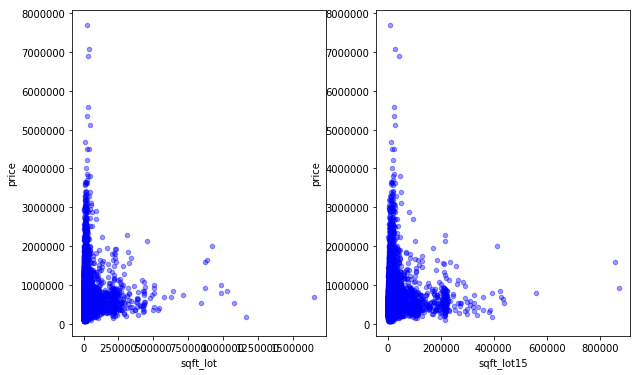

In [31]:
#based on scatter charts it appeared  sqft_lot and sqft_lot15 have some large outliers (see below) - will remove them
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

for xcol, ax in zip(['sqft_lot', 'sqft_lot15'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [32]:
print(data.loc[data['sqft_lot'] > 500000].count()['sqft_lot'])
data.drop(data[data['sqft_lot'] > 500000].index, inplace = True) 

print(data.loc[data['sqft_lot15'] > 500000].count()['sqft_lot15'])
data.drop(data[data['sqft_lot15'] > 500000].index, inplace = True)

21
1


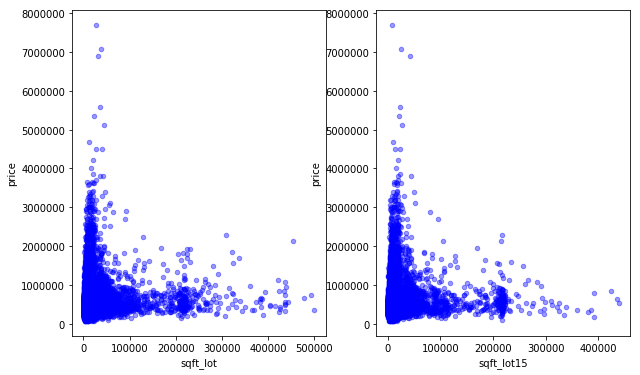

In [33]:
#check updated charts - looks a lot better!
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

for xcol, ax in zip(['sqft_lot', 'sqft_lot15'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

#### 2b iii. Date 
Looking further into the Date houses were sold, it appears the data set is observing houses sold between 05/2014-05/2015 only.

In [34]:
#split date and change to datetime
import datetime
data['date'] = pd.to_datetime(data['date'])
data['yr_sold'] = pd.DatetimeIndex(data['date']).year
data['mo_yr_sold'] = pd.to_datetime(data['date']).dt.to_period('M')
data['yr_sold'].unique() #only houses sold between 2014-2015 are being observed
data['mo_yr_sold'].unique() #only houses sold between May 2014 and May 2015 are being observed
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21511 entries, 7129300520 to 1523300157
Data columns (total 22 columns):
price            21511 non-null float64
date             21511 non-null datetime64[ns]
bedrooms         21511 non-null int64
bathrooms        21511 non-null float64
sqft_living      21511 non-null int64
sqft_lot         21511 non-null int64
floors           21511 non-null float64
waterfront       21511 non-null float64
view             21511 non-null float64
condition        21511 non-null int64
grade            21511 non-null int64
sqft_above       21511 non-null int64
sqft_basement    21511 non-null float64
yr_built         21511 non-null int64
yr_renovated     743 non-null float64
zipcode          21511 non-null int64
lat              21511 non-null float64
long             21511 non-null float64
sqft_living15    21511 non-null int64
sqft_lot15       21511 non-null int64
yr_sold          21511 non-null int64
mo_yr_sold       21511 non-null object
dtypes: datetim

#### 2b iv. Price

Looking at a boxplot of price (our target) it is apparent there are a few outliers that we want to initially remove, those that cost 4M and above

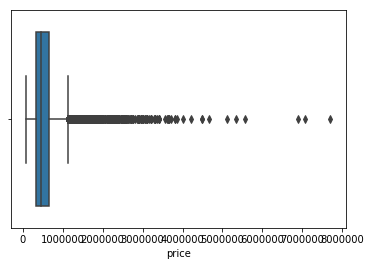

In [35]:
#running boxplot on price
sns.boxplot(data['price'])

In [36]:
data[data['price'] > 4000000].count()['price']

10

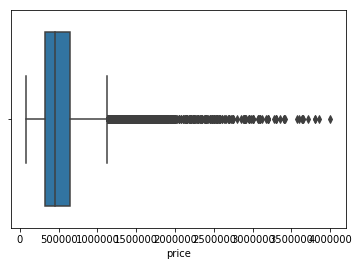

In [37]:
data.drop(data[data['price'] > 4000000].index, inplace = True)
sns.boxplot(data['price'])

### 2c:  Clean Data: Categorical Variables

Looking at the column name description summary provided to us, the descriptive statistics summarizing the central tendency for the continuous numbers, and by producing scatter plots and histograms, it can be concluded that "condition", and "grade" are categorical variables.  

Waterfront is also a categorical variable, however since it is binary (0 or 1) to avoid multicollinerity it can remain as an integer.

View could be a categorical variable, the description of the data fields provided explains it stands for "has been viewed".  Does this mean each house has been viewed only 0-4 times total, it seems low.  Would need more explanation from the resource to truely understand this field.

#### 2c i: Identifying Categorical Variables

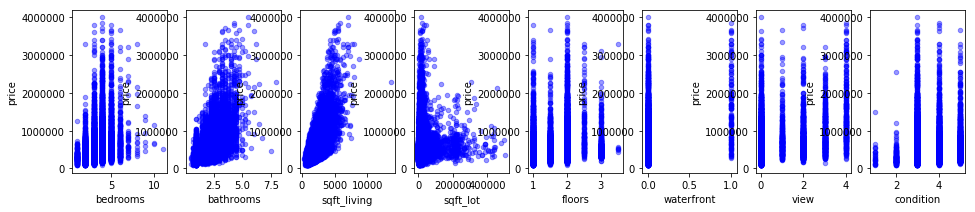

In [38]:
#viewing scatter charts to see if any continuous numbers are actually categorical data 
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(16,3))

for xcol, ax in zip(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                     'waterfront', 'view', 'condition'], axes):
    data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

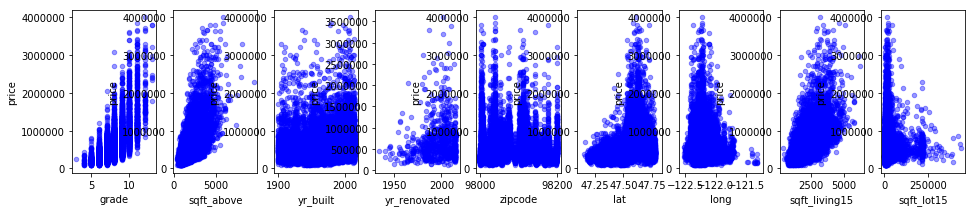

In [39]:
#viewing scatter charts to see if any continuous numbers are actually categorical data 
fig, axes = plt.subplots(nrows=1, ncols=9, figsize=(16,3))

for xcol, ax in zip(['grade', 'sqft_above', 'yr_built', 'yr_renovated', 'zipcode', 
                     'lat', 'long', 'sqft_living15', 'sqft_lot15'], axes):
        data.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

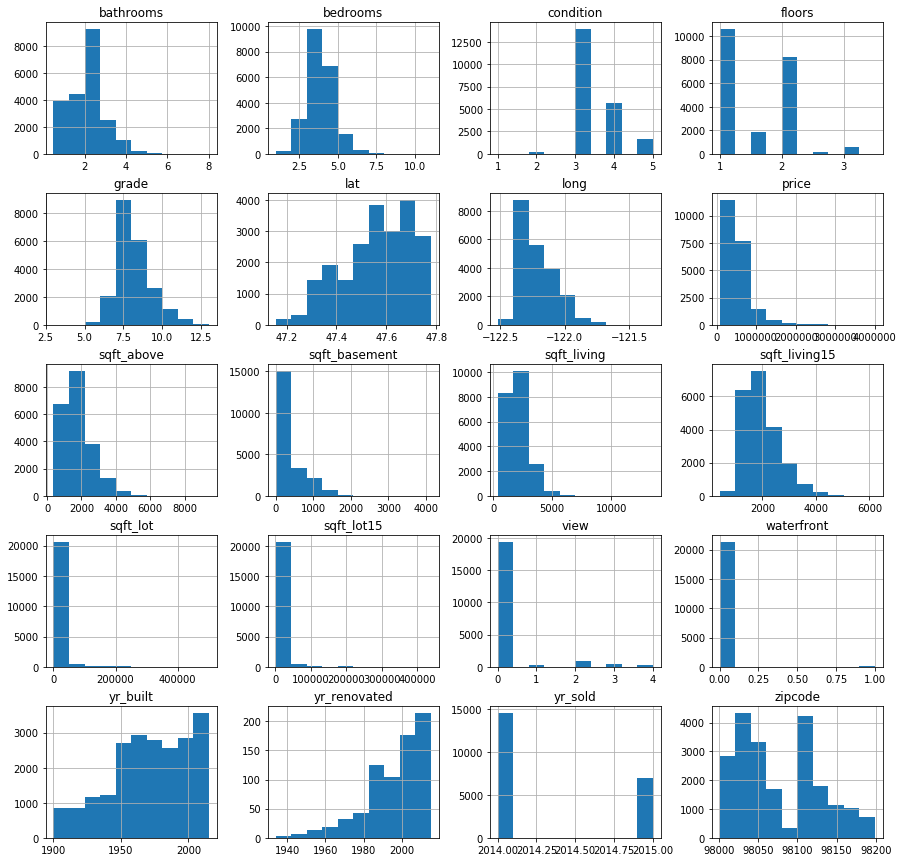

In [40]:
#viewing histograms  to see if any continuous numbers are actually categorical data 
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
data.hist(ax = ax);

In [41]:
data[['condition', 'grade', 'waterfront']].nunique() #waterfront only has 2 values (0 or 1)

condition      5
grade         11
waterfront     2
dtype: int64

#### 2c ii: Transforming Categorical Variables

In [42]:
#Create Dummy Variables (remembering to drop the first column)
dummy_condition = pd.get_dummies(data['condition'], prefix ='cond', drop_first = True)
dummy_grade = pd.get_dummies(data['grade'], prefix ='grade', drop_first = True)

In [43]:
#drop non-dummy original condition and grade columns
data_cat = data.drop(['condition','grade'], axis=1)

In [44]:
#add in condition and grade dummy columns
data_cat = pd.concat([data_cat, dummy_condition, dummy_grade], axis=1)
data_cat.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,sqft_above,...,grade_4,grade_5,grade_6,grade_7,grade_8,grade_9,grade_10,grade_11,grade_12,grade_13
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,2014-10-13,3,1.00,1180,5650,1.0,0.0,0.0,1180,...,0,0,0,1,0,0,0,0,0,0
6414100192,538000.0,2014-12-09,3,2.25,2570,7242,2.0,0.0,0.0,2170,...,0,0,0,1,0,0,0,0,0,0
5631500400,180000.0,2015-02-25,2,1.00,770,10000,1.0,0.0,0.0,770,...,0,0,1,0,0,0,0,0,0,0
2487200875,604000.0,2014-12-09,4,3.00,1960,5000,1.0,0.0,0.0,1050,...,0,0,0,1,0,0,0,0,0,0
1954400510,510000.0,2015-02-18,3,2.00,1680,8080,1.0,0.0,0.0,1680,...,0,0,0,0,1,0,0,0,0,0


In [45]:
#Check: make sure prior dataset is still the same
data.head()

,price,date,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold,mo_yr_sold
id,,,,,,,,,,,,,,,,,,,,,
7129300520,221900.0,2014-10-13,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,1955,NaN,98178,47.5112,-122.257,1340,5650,2014,2014-10
6414100192,538000.0,2014-12-09,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,2014,2014-12
5631500400,180000.0,2015-02-25,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062,2015,2015-02
2487200875,604000.0,2014-12-09,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910.0,1965,NaN,98136,47.5208,-122.393,1360,5000,2014,2014-12
1954400510,510000.0,2015-02-18,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,1987,NaN,98074,47.6168,-122.045,1800,7503,2015,2015-02


In [46]:
#check data information again
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21501 entries, 7129300520 to 1523300157
Data columns (total 22 columns):
price            21501 non-null float64
date             21501 non-null datetime64[ns]
bedrooms         21501 non-null int64
bathrooms        21501 non-null float64
sqft_living      21501 non-null int64
sqft_lot         21501 non-null int64
floors           21501 non-null float64
waterfront       21501 non-null float64
view             21501 non-null float64
condition        21501 non-null int64
grade            21501 non-null int64
sqft_above       21501 non-null int64
sqft_basement    21501 non-null float64
yr_built         21501 non-null int64
yr_renovated     740 non-null float64
zipcode          21501 non-null int64
lat              21501 non-null float64
long             21501 non-null float64
sqft_living15    21501 non-null int64
sqft_lot15       21501 non-null int64
yr_sold          21501 non-null int64
mo_yr_sold       21501 non-null object
dtypes: datetim

## 3. Explore Data

Now that our data has been cleaned, further explore to visually analyze the data

In [47]:
#reminder of the data we have in the dataset
data.columns

Index(['price', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'yr_sold', 'mo_yr_sold'],
      dtype='object')

In [48]:
#return statistics
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,yr_sold
count,2.150100e+04,21501.000000,21501.000000,21501.000000,21501.000000,21501.000000,21501.000000,21501.000000,21501.000000,21501.000000,21501.000000,21501.000000,21501.000000,740.000000,21501.000000,21501.000000,21501.000000,21501.000000,21501.000000,21501.000000
mean,5.374104e+05,3.371053,2.113541,2075.955490,14292.385377,1.493791,0.006511,0.232222,3.409748,7.654435,1785.396679,284.523557,1970.989628,1995.917568,98077.997163,47.560262,-122.214125,1985.393842,12510.716990,2014.322450
std,3.486942e+05,0.903372,0.763663,904.636113,31895.713227,0.539786,0.080432,0.762539,0.650585,1.167395,819.456437,436.753247,29.371838,15.630111,53.511604,0.138467,0.140514,684.110008,25027.354159,0.467425
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,1934.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,3.215000e+05,3.000000,1.750000,1422.000000,5040.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1987.000000,98033.000000,47.471300,-122.328000,1490.000000,5100.000000,2014.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7609.000000,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,2000.000000,98065.000000,47.571900,-122.231000,1840.000000,7620.000000,2014.000000
75%,6.430000e+05,4.000000,2.500000,2550.000000,10650.000000,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,540.000000,1997.000000,2007.250000,98118.000000,47.678100,-122.125000,2360.000000,10077.000000,2015.000000
max,4.000000e+06,11.000000,8.000000,13540.000000,499571.000000,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,438213.000000,2015.000000


### 3a. Target Exploration

- Looking at a histogram of price (our target variable), we see a large amount of skewness and the residuals do not appear to follow a normal distribution.  
- Will look into normalizing the price using a log transformation later on.

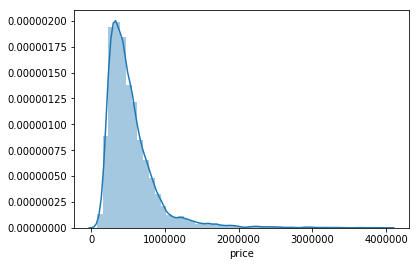

In [49]:
#viewing histograms 
sns.distplot(data['price']);

### 3b. Feature Exploration

#### 3b i: Price vs. Location

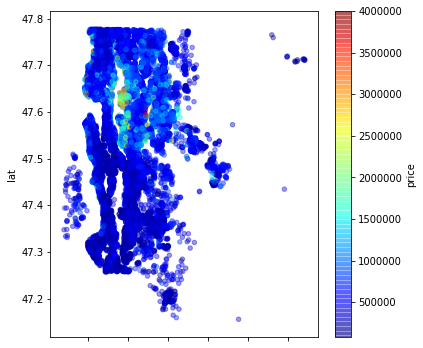

In [50]:
data.plot(kind = 'scatter', x = 'long', y = 'lat', alpha=0.4, c = 'price', 
          cmap=plt.get_cmap("jet"), colorbar=True, figsize=(6,6))
plt.show()

In [ ]:
data.head()